## 2. Machine Learning for Regression

In [110]:
import pandas as pd
import numpy as np

## Load Data

In [111]:
carprice = pd.read_csv('data.csv')

In [112]:
carprice.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [113]:
# fix inconsistent column names
carprice.columns = carprice.columns.str.lower().str.replace(' ', '_')

In [114]:
carprice.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [115]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [116]:
# get the dtypes of all the columns
carprice.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [117]:
carprice.dtypes[carprice.dtypes == 'object'] # get all object cols

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [118]:
# convert all object cols to python list
string_s = carprice.dtypes[carprice.dtypes == 'object'].index.tolist()
string_s

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [119]:
# uniformize the values in each object column
for col in string_s:
    carprice[col] = carprice[col].str.lower().str.replace(' ', '_')

In [120]:
carprice.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [121]:
for col in carprice.columns:
    print(col)
    print(carprice[col].unique()[:5])
    print(carprice[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type


['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 34500]
6049



### Distribution of Price

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

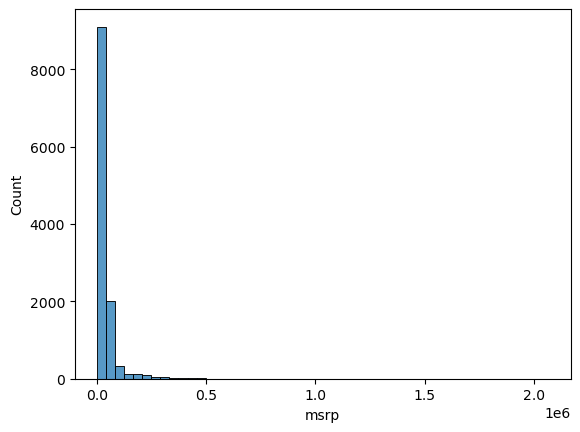

In [123]:
sns.histplot(carprice.msrp, bins=50) # long tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

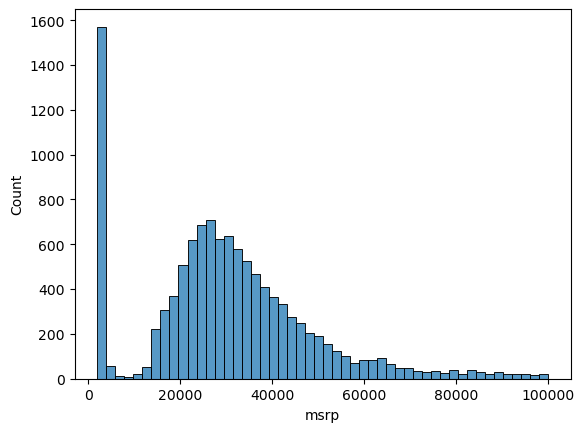

In [124]:
sns.histplot(carprice.msrp[carprice.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

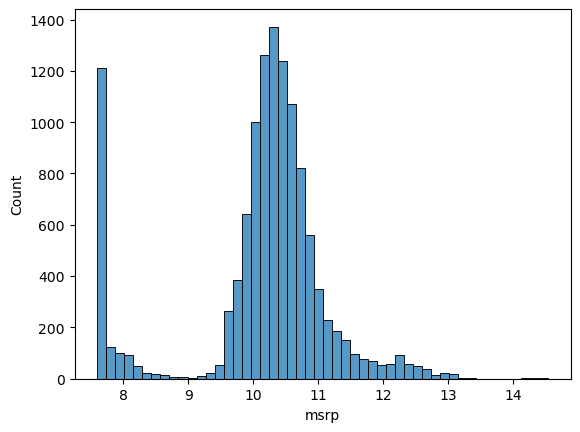

In [125]:
# long tail distribution often confuses an ML model so we have to log transform the price column to make it compact
price_logs = np.log1p(carprice.msrp) # this is now a normal distribution
sns.histplot(price_logs, bins=50) 

## Setting up the validation framework (manual train_test_split)

In [126]:
n = len(carprice)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_val_test = n_val + n_test
n_train = n - n_val_test #n_val - n_test

In [127]:
n

11914

In [128]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [129]:
df_test = carprice.iloc[n_val:n_val+n_test]
df_val = carprice.iloc[:n_val]
df_train = carprice.iloc[n_val+n_test:]

In [130]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [131]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [132]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,porsche,cayenne,2017,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,159600
2383,porsche,cayenne,2017,premium_unleaded_(required),420.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,1715,76200
2384,porsche,cayman_s,2006,premium_unleaded_(required),295.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,26,18,1715,58900
2385,porsche,cayman,2014,premium_unleaded_(required),275.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,30,20,1715,52600
2386,porsche,cayman,2014,premium_unleaded_(required),325.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,63800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,ford,flex,2016,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,42600
4760,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32300
4761,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,wagon,23,16,5657,29600
4762,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,34250


In [133]:
df_train = carprice.iloc[:n_train]
df_val = carprice.iloc[n_train:n_train+n_val]
df_test = carprice.iloc[n_train+n_val:]

len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [134]:
# create an indx to help in shuffling the data
idx = np.arange(n)

In [135]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [136]:
# set a seed and shuffle idx
np.random.seed(2)
np.random.shuffle(idx)

In [137]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [138]:
# apply shuffled idx to the dataset
df_train = carprice.iloc[idx[:n_train]]
df_val = carprice.iloc[idx[n_train:n_train+n_val]]
df_test = carprice.iloc[idx[n_train+n_val:]]

In [139]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [140]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [141]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [142]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [143]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [144]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [145]:
len(y_train), len(y_test), len(y_val)

(7150, 2382, 2382)

In [146]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [147]:
y_val

array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(2382,))

In [148]:
y_test

array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
       10.00789261, 10.40414162], shape=(2382,))

In [149]:
# del target column from train, test, val data
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# **Linear Regression**

In [150]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [151]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [152]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [153]:
xi = [453, 11, 86]

In [154]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

## Linear Regression Formula

Linear regression model:

$$g(x_i) = w_0 + w_1 x_{i1} + w_2 x_{i2} + w_3 x_{i3} + \ldots + w_n x_{in}$$

Where:
- $w_0$ is the bias/intercept term
- $w_j$ are the weights/coefficients for features
- $x_{ij}$ are the feature values

**Condensed notation:**
$$g(x_i) = w_0 + \sum_{j=1}^{n} w_j x_{ij}$$

**Vector notation:**
$$g(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$$

In [155]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [156]:
linear_regression(xi)

12.312

In [157]:
# to get the actual price
np.expm1(12.312)

np.float64(222347.2221101062)

### **Linear Regression in vector form** (mulitple features)

In [158]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    
    return res

In [159]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [160]:
w_new = [w0] + w

In [161]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [162]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [163]:
linear_regression(xi)

12.312

In [164]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [165]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [166]:
def linear_regression(X):
    return X.dot(w_new)

In [167]:
results = linear_regression(X)

In [168]:
results

array([12.38 , 13.552, 12.312])

In [169]:
for price in results:
    predicted_price = np.expm1(price)
    print(predicted_price)

237992.82334859075
768348.5101897252
222347.22211010658


## **Training a linear regression model**

In [170]:
X_clean = [
    [148, 24, 1385],
    [132, 25, 2031], 
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],    # Changed from duplicate [453, 11, 86]
    [38, 54, 185],
    [142, 25, 431],
    [350, 15, 120],   # Changed from duplicate [453, 11, 86]
]

X_clean = np.array(X_clean)
y_clean = [100, 200, 150, 250, 100, 140, 200, 250, 130]  # Adjusted y values

In [171]:
XTX = X_clean.T.dot(X_clean)

In [172]:
XTX_inv = np.linalg.inv(XTX)

In [173]:
XTX.dot(XTX_inv).round()

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

In [174]:
ones = np.ones(X_clean.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [175]:
X = np.column_stack([ones, X_clean])

In [176]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 3.500e+02, 1.500e+01, 1.200e+02]])

In [177]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [178]:
train_linear_regression(X_clean, y_clean)

(np.float64(267.56081465283665),
 array([-0.27981291, -1.04890204, -0.02171499]))

## **Car price baseline model**

In [179]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [180]:
# select some columns
base = ['engine_hp','engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].values

In [181]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [182]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [183]:
df_train[base] = df_train[base].fillna(0)

In [184]:
df_train[base].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [185]:
X_train = df_train[base]


In [186]:
w0, w = train_linear_regression(X_train, y_train)

In [187]:
y_pred = w0 + X_train.dot(w)

In [188]:
y_pred

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

<Axes: ylabel='Count'>

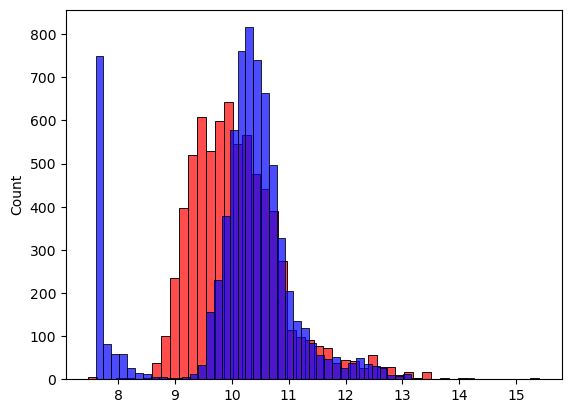

In [189]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.7)
sns.histplot(y_train, color='blue', bins=50, alpha=0.7)

## **Validating Regression Models - RMSE**

In [190]:
def rmse(y, y_pred):
    # error = y - y_pred 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [191]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validating the model - continuation

In [192]:
def prepare_X(df_train):
    # select the numerical cols
    df_num = df_train[base]
    
    # correct missing values
    df_num = df_num.fillna(0)
    
    # get numpy array of X values
    X = df_num.values
    
    return X

In [193]:
# test function
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train) # training

# validation
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147], shape=(2382,))

In [194]:
rmse(y_val, y_pred) # root mean squared error

np.float64(0.7616530991301627)

### **Simple feature Engineering**

In [195]:
df_train.year.max()

np.int64(2017)

In [196]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [197]:
# add a new column
def prepare_X(df):
    
    df = df.copy()
    # add a new column
    df['age'] = 2017 - df.year
    
    feature = base + ['age']
    
    # select the numerical cols
    df_num = df[feature]
    
    # correct missing values
    df_num = df_num.fillna(0)
    
    # get numpy array of X values
    X = df_num.values
    
    return X

In [198]:
X_train = prepare_X(df_train)

In [199]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [200]:
X_train[:5]

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       [9.000e+01, 4.000e+00, 1.800e+01, 1.600e+01, 8.730e+02, 2.600e+01],
       [3.850e+02, 8.000e+00, 2.100e+01, 1.500e+01, 5.657e+03, 0.000e+00]])

In [201]:
# test function
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train) # training

# validation
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

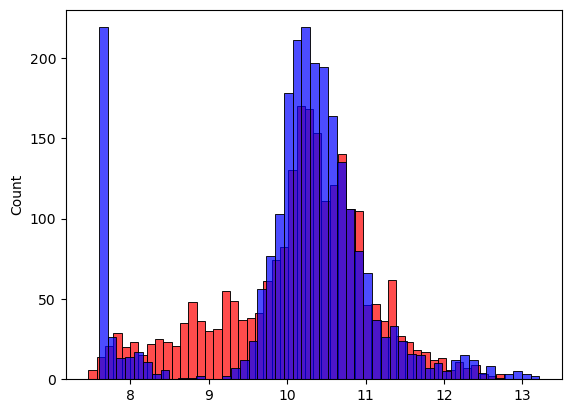

In [202]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.7)
sns.histplot(y_val, color='blue', bins=50, alpha=0.7)

## **Categorical Variables**

In [203]:
makes = carprice.make.value_counts().head().index.to_list()

In [204]:
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [205]:
categorical_variables = ['make', 'market_category', 'vehicle_size', 
                         'engine_fuel_type', 'transmission_type',
                         'driven_wheels', 'vehicle_style'
                         ]

In [206]:
categories = {}

for c in categorical_variables:
    categories[c] = carprice[c].value_counts().head().index.to_list()

In [207]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [208]:
def prepare_X(df):
    
    df = df.copy()
    # add a new column
    df['age'] = 2017 - df.year
    
    feature = base + ['age']
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        feature.append(f'num_doors_{v}')
    
    for c, values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c] == v).astype('int')
            feature.append(f'{c}_{v}')

    # select the numerical cols
    df_num = df[feature]
    
    # correct missing values
    df_num = df_num.fillna(0)
    
    # get numpy array of X values
    X = df_num.values
    
    return X

In [209]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   0.]], shape=(7150, 41))

In [210]:
# test function
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train) # training

# validation
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(291.42899582270786)

In [211]:
w0

np.float64(2.5937017976610348e+16)

## **REgularization**

In [215]:
X = [
    [4, 4.000001, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.000001  , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [219]:
y = [1, 2, 3, 1, 2, 3]

In [216]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.000004  , 111.00000004],
       [111.000004  , 108.000008  , 108.00000405],
       [111.00000004, 108.00000405, 108.0000001 ]])

In [217]:
XTX_inv = np.linalg.inv(XTX)


In [218]:
XTX_inv

array([[ 3.86028675e-02,  4.58923815e+03, -4.58927802e+03],
       [ 4.58923802e+03,  1.19269048e+12, -1.19269053e+12],
       [-4.58927786e+03, -1.19269053e+12,  1.19269058e+12]])

In [220]:
XTX_inv.dot(X.T).dot(y)

array([ 3.32274518e-01, -8.09653190e+05,  8.09653303e+05])

In [ ]:
# to solve the issue of very large bias and RMSE, we often add a small number called the alpha to the diagonal of the feature values
XTX = [
    [1, 2, 2],
    [2, 1, 1.00001],
    [2, 1.00001, 1]
]

XTX = np.array(XTX)

In [222]:
np.linalg.inv(XTX)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

In [224]:
XTX = XTX + 0.01 * np.eye(3)

XTX

array([[1.01   , 2.     , 2.     ],
       [2.     , 1.01   , 1.00001],
       [2.     , 1.00001, 1.01   ]])

In [225]:
np.linalg.inv(XTX)

array([[ -0.3366913 ,   0.33501455,   0.33501455],
       [  0.33501455,  49.96545888, -50.13464122],
       [  0.33501455, -50.13464122,  49.96545888]])

In [226]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # regularization term
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [227]:
# test function
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train, y_train, r=0.01) # training

# validation
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.45652199010870764)

## **Tuning the Model**

In [228]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:

    X_train = prepare_X(df_train)

    w0, w = train_linear_regression_reg(X_train, y_train, r=r) # training

    # validation
    X_val = prepare_X(df_val)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 2.5937017976610348e+16 291.42899582270786
1e-05 8.735936366451025 0.4565170251263673
0.0001 6.289237693492333 0.4565170634626589
0.001 6.28572805704621 0.456517508607281
0.1 6.191208608067358 0.4565692762997266
1 5.6348966679872445 0.457220431799889
10 4.283980108959334 0.47014569321001115


## **Using the model**

In [229]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [230]:
X_full_train = prepare_X(df_full_train)

X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [232]:
y_full_train = np.concat([y_train, y_val])

y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [233]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001) # training

In [234]:
w0

np.float64(6.3222383496291545)

In [235]:
w

array([ 1.52506334e-03,  1.18188697e-01, -6.66105608e-03, -5.33413935e-03,
       -4.87603208e-05, -9.69091844e-02, -7.92621343e-01, -8.90862553e-01,
       -6.35101275e-01, -4.14339229e-02,  1.75560742e-01, -5.78067033e-04,
       -1.00563876e-01, -9.27549663e-02, -9.70559770e-02,  3.73062086e-02,
       -5.81767488e-02, -2.35940842e-02, -1.19357162e-02,  2.18937384e+00,
        2.07500394e+00,  2.05958810e+00, -4.66859129e-01,  7.98659539e-02,
       -3.16047679e-01, -5.51981649e-01, -7.89525833e-02,  1.09438368e+00,
        9.19076143e-01,  1.14865354e+00,  2.65178944e+00,  5.09012753e-01,
        1.62955830e+00,  1.53026236e+00,  1.61744108e+00,  1.54544047e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [236]:
# prepare test dataset
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4517749308634039)

In [237]:
# train on car prices dataset
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [238]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [239]:
X_small = prepare_X(df_small)

In [240]:
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [241]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.462651700408179)

In [ ]:
np.expm1(y_pred) # predicted price

np.float64(34983.196166872716)

In [ ]:
np.expm1(y_test[20]) # actual price

np.float64(35000.00000000001)